In [1]:
import nfdrs4py
import pandas as pd
import numpy as np
import requests
import io

In [13]:
wx = pd.read_csv('data/241513_2001_2017.fw21')
wx

,DateTime,Temperature(F),RelativeHumidity(%),Precipitation(in),WindSpeed(mph),WindAzimuth(degrees),SolarRadiation(W/m2),SnowFlag,GustSpeed(mph),GustAzimuth(degrees)
0,2001-03-22T15:00:00-07:00,62.0,16.0,0.0,4.0,6.0,650.0,1.0,8.0,34.0
1,2001-03-22T16:00:00-07:00,58.0,15.0,0.0,2.0,69.0,188.0,1.0,7.0,60.0
2,2001-03-22T17:00:00-07:00,60.0,12.0,0.0,5.0,270.0,93.0,1.0,16.0,243.0
3,2001-03-22T18:00:00-07:00,58.0,12.0,0.0,7.0,278.0,178.0,1.0,19.0,258.0
4,2001-03-22T19:00:00-07:00,57.0,10.0,0.0,8.0,300.0,26.0,1.0,13.0,289.0
...,...,...,...,...,...,...,...,...,...,...
143019,2017-12-31T19:00:00-07:00,18.0,93.0,0.0,0.0,196.0,0.0,NaN,0.0,186.0
143020,2017-12-31T20:00:00-07:00,18.0,93.0,0.0,0.0,241.0,0.0,NaN,0.0,340.0
143021,2017-12-31T21:00:00-07:00,17.0,90.0,0.0,0.0,215.0,0.0,NaN,0.0,254.0
143022,2017-12-31T22:00:00-07:00,17.0,92.0,0.0,0.0,196.0,0.0,NaN,0.0,224.0


In [14]:
interface = nfdrs4py.NFDRS4py(Lat=40,FuelModel='W',SlopeClass=1,AvgAnnPrecip=30)
results = interface.process_df(wx,0,1,2,3,6,4,7)
results

,DateTime,Temperature(F),RelativeHumidity(%),Precipitation(in),WindSpeed(mph),WindAzimuth(degrees),SolarRadiation(W/m2),SnowFlag,GustSpeed(mph),GustAzimuth(degrees),...,dmc_100_hr,dmc_1000_hr,lmc_herb,lmc_woody,burning_index,energy_release_component,spread_component,ignition_component,growing_season_index,kb_drought_index
0,2001-03-22T15:00:00-07:00,62.0,16.0,0.0,4.0,6.0,650.0,1.0,8.0,34.0,...,19.999983,20.0,30.0,60.0,0.0,0.0,0.0,0.0,0.0,100.0
1,2001-03-22T16:00:00-07:00,58.0,15.0,0.0,2.0,69.0,188.0,1.0,7.0,60.0,...,19.999862,20.0,30.0,60.0,0.0,0.0,0.0,0.0,0.0,100.0
2,2001-03-22T17:00:00-07:00,60.0,12.0,0.0,5.0,270.0,93.0,1.0,16.0,243.0,...,19.999945,20.0,30.0,60.0,0.0,0.0,0.0,0.0,0.0,100.0
3,2001-03-22T18:00:00-07:00,58.0,12.0,0.0,7.0,278.0,178.0,1.0,19.0,258.0,...,19.999889,20.0,30.0,60.0,0.0,0.0,0.0,0.0,0.0,100.0
4,2001-03-22T19:00:00-07:00,57.0,10.0,0.0,8.0,300.0,26.0,1.0,13.0,289.0,...,19.999959,20.0,30.0,60.0,0.0,0.0,0.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143019,2017-12-31T19:00:00-07:00,18.0,93.0,0.0,0.0,196.0,0.0,NaN,0.0,186.0,...,NaN,NaN,30.0,60.0,NaN,NaN,NaN,NaN,0.0,384.0
143020,2017-12-31T20:00:00-07:00,18.0,93.0,0.0,0.0,241.0,0.0,NaN,0.0,340.0,...,NaN,NaN,30.0,60.0,NaN,NaN,NaN,NaN,0.0,384.0
143021,2017-12-31T21:00:00-07:00,17.0,90.0,0.0,0.0,215.0,0.0,NaN,0.0,254.0,...,NaN,NaN,30.0,60.0,NaN,NaN,NaN,NaN,0.0,384.0
143022,2017-12-31T22:00:00-07:00,17.0,92.0,0.0,0.0,196.0,0.0,NaN,0.0,224.0,...,NaN,NaN,30.0,60.0,NaN,NaN,NaN,NaN,0.0,384.0


## Get RAWS Weather Data

In [15]:
station_id = '20284'
start_date = '2018-05-23T23:30:00Z'
end_date = '2018-06-03T23:29:59Z'
url = f'https://fems.fs2c.usda.gov/api/climatology/download-weather?stationIds={station_id}&startDate={start_date}&endDate={end_date}&dataset=observation&dataFormat=fw21&dataIncrement=hourly&stationtypes=RAWS(SATNFDRS)'
request = requests.get(url)
wx = pd.read_csv(io.BytesIO(request.content))
wx['SnowFlag'] = wx['SnowFlag'].astype(bool)
wx

,StationId,DateTime,Temperature(F),RelativeHumidity(%),Precipitation(in),WindSpeed(mph),WindAzimuth(degrees),GustSpeed(mph),GustAzimuth(degrees),SnowFlag,SolarRadiation(W/m2),Tflag,RHflag,PCPflag,WSflag,WAflag,SRflag,GSflag,GAflag
0,20284,2018-05-24T00:00:00-07:00,34,39,0.0,2,322,4,217,False,0.0,0,0,0,0,0,0,0,0
1,20284,2018-05-24T01:00:00-07:00,32,42,0.0,2,60,3,52,False,0.0,0,0,0,0,0,0,0,0
2,20284,2018-05-24T02:00:00-07:00,29,46,0.0,1,212,2,50,False,0.0,0,0,0,0,0,0,0,0
3,20284,2018-05-24T03:00:00-07:00,28,48,0.0,1,189,3,12,False,0.0,0,0,0,0,0,0,0,0
4,20284,2018-05-24T04:00:00-07:00,26,56,0.0,1,182,4,223,False,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,20284,2018-06-03T19:00:00-07:00,79,9,0.0,7,216,15,270,False,113.0,0,0,0,0,0,0,0,0
260,20284,2018-06-03T20:00:00-07:00,68,13,0.0,3,223,8,216,False,4.0,0,0,0,0,0,0,0,0
261,20284,2018-06-03T21:00:00-07:00,59,18,0.0,5,225,6,232,False,0.0,0,0,0,0,0,0,0,0
262,20284,2018-06-03T22:00:00-07:00,52,22,0.0,2,355,5,224,False,0.0,0,0,0,0,0,0,0,0


In [16]:
interface = nfdrs4py.NFDRS4py(Lat=40,FuelModel='W',SlopeClass=1,AvgAnnPrecip=30,)

In [19]:
results = interface.process_df(wx)
results

,StationId,DateTime,Temperature(F),RelativeHumidity(%),Precipitation(in),WindSpeed(mph),WindAzimuth(degrees),GustSpeed(mph),GustAzimuth(degrees),SnowFlag,...,dmc_100_hr,dmc_1000_hr,lmc_herb,lmc_woody,burning_index,energy_release_component,spread_component,ignition_component,growing_season_index,kb_drought_index
0,20284,2018-05-24T00:00:00-07:00,34,39,0.0,2,322,4,217,False,...,8.630694,13.337515,30.0,60.0,22.471078,10.204840,7.747199,14.670750,0.074623,161.0
1,20284,2018-05-24T01:00:00-07:00,32,42,0.0,2,60,3,52,False,...,8.623506,13.331353,30.0,60.0,21.210047,9.336192,7.468862,11.283630,0.074623,161.0
2,20284,2018-05-24T02:00:00-07:00,29,46,0.0,1,212,2,50,False,...,8.618583,13.327216,30.0,60.0,16.757231,7.728113,5.405973,6.644450,0.074623,161.0
3,20284,2018-05-24T03:00:00-07:00,28,48,0.0,1,189,3,12,False,...,8.614778,13.323929,30.0,60.0,14.446749,6.099911,4.960825,4.352117,0.074623,161.0
4,20284,2018-05-24T04:00:00-07:00,26,56,0.0,1,182,4,223,False,...,8.611390,13.320912,30.0,60.0,12.434139,4.825499,4.525799,3.068209,0.074623,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,20284,2018-06-03T19:00:00-07:00,79,9,0.0,7,216,15,270,False,...,7.350206,10.497513,30.0,60.0,45.342070,13.661792,26.620747,50.940939,0.078176,219.0
260,20284,2018-06-03T20:00:00-07:00,68,13,0.0,3,223,8,216,False,...,7.335271,10.485969,30.0,60.0,30.664136,13.171526,11.797987,30.456869,0.078176,219.0
261,20284,2018-06-03T21:00:00-07:00,59,18,0.0,5,225,6,232,False,...,7.439944,10.477891,30.0,60.0,35.703801,12.437392,17.393017,31.900866,0.078176,219.0
262,20284,2018-06-03T22:00:00-07:00,52,22,0.0,2,355,5,224,False,...,7.432732,10.472230,30.0,60.0,24.635221,11.526632,8.376418,18.473684,0.078176,219.0


In [ ]:
pd.DataFrame().plot()

<Axes: xlabel='DateTime'>

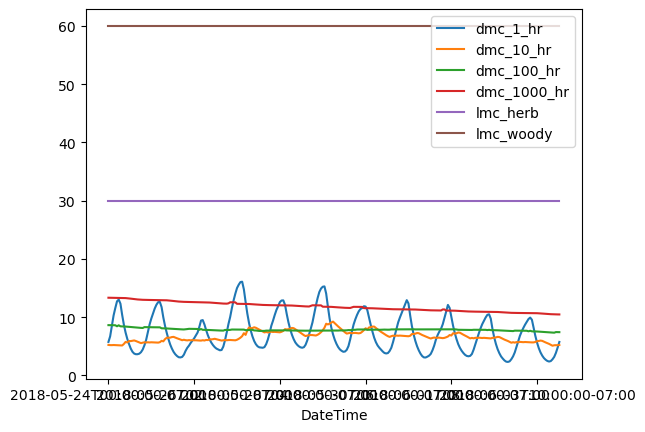

In [22]:
results.plot(x='DateTime',y=['dmc_1_hr','dmc_10_hr','dmc_100_hr','dmc_1000_hr','lmc_herb','lmc_woody'])

In [47]:
import configparser
import ast

In [115]:
fp = 'data/NFDRSInitSample.txt'
run_config = configparser.ConfigParser()
lines = []
with open(fp,encoding='utf8') as f:
    line = f.readline()
    if '[' not in line:
        lines.append('[general]\n')
    while line:
        if '{' in line:
            split = line.split('{')
            section = split[0].strip()
            lines.append(f'[{section}]\n')
            if len(split) > 0:
                line = ' '.join(split[1:])
        line = line.replace('}','')
        line = line.replace('@copyFrom',f'@copyFrom = ')
        lines.append(line)
        line = f.readline()

In [116]:
run_config.read_string(''.join(lines))

In [129]:
d = {}
for section in run_config.keys():
    d[section] = {}
    
    if '@copyfrom' in run_config[section].keys():
        copyfrom = run_config[section]['@copyfrom'].strip('\";\'')
        for item in d[copyfrom].items():
            d[section][item[0]] = item[1]
    
    for option in run_config[section].keys():
        if not '@copy' in option:
            val = run_config[section][option]
            if type(val) is str:
                val = val.replace('\"','').replace(';','').replace('\'','')
                vl = val.lower()
                if vl=='true' or vl=='t':
                    val = True
                elif vl=='false' or vl=='f':
                    val = False
                else:
                    try:
                        val = ast.literal_eval(val)
                    except (ValueError, SyntaxError):
                        val = str(val)
        
            d[section][option] = val

In [130]:
d

{'DEFAULT': {},
 'general': {'latitude': 46.82056,
  'fuelmodel': 'Y',
  'slopeclass': 1,
  'avgannualprecip': 13.4,
  'useloadtransfer': 1,
  'usecure': 1,
  'isannuals': 1,
  'kbdithreshold': 100,
  'startkbdi': 100,
  'mxd': 0,
  'obshour': 13,
  'timezoneoffset': -6,
  'maxsc': 0},
 'liveFuelMoisture.defaults': {'gsimax': 1.0,
  'gsiherbgreenup': 0.5,
  'gsitminmin': -2,
  'gsitminmax': 5,
  'gsivpdmin': 900,
  'gsivpdmax': 4100,
  'gsidaylenmin': 36000,
  'gsidaylenmax': 39600,
  'gsiusevpdavg': 0,
  'gsiaveragingdays': 21,
  'gsinumprecipdays': 30,
  'gsirtprecipmin': 0.5,
  'gsirtprecipmax': 1.5,
  'gsiusertprecip': 0,
  'fuelmoisturemax': 100,
  'fuelmoisturemin': 0},
 'gsi_opts': {'gsimax': 1.0,
  'gsiherbgreenup': 0.5,
  'gsitminmin': -2,
  'gsitminmax': 5,
  'gsivpdmin': 900,
  'gsivpdmax': 4100,
  'gsidaylenmin': 36000,
  'gsidaylenmax': 39600,
  'gsiusevpdavg': 0,
  'gsiaveragingdays': 21,
  'gsinumprecipdays': 30,
  'gsirtprecipmin': 0.5,
  'gsirtprecipmax': 1.5,
  'gsius

In [131]:
d.keys()

dict_keys(['DEFAULT', 'general', 'liveFuelMoisture.defaults', 'gsi_opts', 'herb_opts', 'woody_opts', 'deadFuelMoisture.defaults', '1hr_opts', '10hr_opts', '100hr_opts', '1000hr_opts', 'customFuelModel'])

In [1]:
import nfdrs4py
config = nfdrs4py.read_config('data/NFDRSInitSample.txt')
nfdrs4py.NFDRS4py.init_from_config(config)

In [3]:
config.keys()

dict_keys(['DEFAULT', 'general', 'liveFuelMoisture.defaults', 'gsi_opts', 'herb_opts', 'woody_opts', 'deadFuelMoisture.defaults', '1hr_opts', '10hr_opts', '100hr_opts', '1000hr_opts', 'customFuelModel'])

In [4]:
config['gsi_opts']

{'gsimax': 1.0,
 'gsiherbgreenup': 0.5,
 'gsitminmin': -2,
 'gsitminmax': 5,
 'gsivpdmin': 900,
 'gsivpdmax': 4100,
 'gsidaylenmin': 36000,
 'gsidaylenmax': 39600,
 'gsiusevpdavg': 0,
 'gsiaveragingdays': 21,
 'gsinumprecipdays': 30,
 'gsirtprecipmin': 0.5,
 'gsirtprecipmax': 1.5,
 'gsiusertprecip': 0,
 'fuelmoisturemax': 100,
 'fuelmoisturemin': 0}